# FitBit Fitness Tracker Data (BellaBeat)

Do people who walk more than 10,000 steps a day burn more calories and sleep better than people who walk less than 5,000 steps a day?

This is what we will find out exploring the data.

Data used = https://www.kaggle.com/arashnic/fitbit

# Starting...


# All scanning and cleaning was done in python and seaborn for viewing

In [48]:
import pandas as pd

In [49]:
bella_beat = pd.read_csv(r"C:\Users\HKC_H\OneDrive - pluus20\HKC\data-analytics\Learn\Google Course\bella_beat\archive\Fitabase Data 4.12.16-5.12.16\allDataDailyActivities.csv")
bella_beat

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832



# Separating only total steps and calories

In [57]:
total_steps = bella_beat[["Id", "TotalSteps", "Calories"]]
(total_steps)

,Id,TotalSteps,Calories
0,1503960366,13162,1985
1,1503960366,10735,1797
2,1503960366,10460,1776
3,1503960366,9762,1745
4,1503960366,12669,1863
...,...,...,...
935,8877689391,10686,2847
936,8877689391,20226,3710
937,8877689391,10733,2832
938,8877689391,21420,3832



# Getting the sleep table

In [58]:
sleep = pd.read_csv(r"C:\Users\HKC_H\OneDrive - pluus20\HKC\data-analytics\Learn\Google Course\bella_beat\archive\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")
sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545



# Separate only the data needed for analysis

In [59]:
sleep = sleep[["Id", "TotalMinutesAsleep", "TotalTimeInBed"]]
sleep

,Id,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,327,346
1,1503960366,384,407
2,1503960366,412,442
3,1503960366,340,367
4,1503960366,700,712
...,...,...,...
408,8792009665,343,360
409,8792009665,503,527
410,8792009665,415,423
411,8792009665,516,545


# Discovering the time stayed in bed before sleep

In [60]:
sleep["totalMinutesBeforeSleep"] = sleep["TotalTimeInBed"] -  sleep["TotalMinutesAsleep"]
sleep

<ipython-input-60-a1ef2c17da9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep["totalMinutesBeforeSleep"] = sleep["TotalTimeInBed"] -  sleep["TotalMinutesAsleep"]


,Id,TotalMinutesAsleep,TotalTimeInBed,totalMinutesBeforeSleep
0,1503960366,327,346,19
1,1503960366,384,407,23
2,1503960366,412,442,30
3,1503960366,340,367,27
4,1503960366,700,712,12
...,...,...,...,...
408,8792009665,343,360,17
409,8792009665,503,527,24
410,8792009665,415,423,8
411,8792009665,516,545,29


In [24]:
sleep = sleep.drop(["TotalTimeInBed"], axis=1)
sleep

,Id,TotalMinutesAsleep,totalMinutesBeforeSleep
0,1503960366,327,19
1,1503960366,384,23
2,1503960366,412,30
3,1503960366,340,27
4,1503960366,700,12
...,...,...,...
408,8792009665,343,17
409,8792009665,503,24
410,8792009665,415,8
411,8792009665,516,29


# The average of TotalSteps and Calories based on ID.

In [25]:
avgStepsCal = bella_beat[["Id", "TotalSteps", "Calories"]]
avgStepsCal = (avgStepsCal.groupby(["Id"]).mean())
avgStepsCal

,TotalSteps,Calories
Id,,
1503960366,12116.741935,1816.419355
1624580081,5743.903226,1483.354839
1644430081,7282.966667,2811.300000
1844505072,2580.064516,1573.483871
1927972279,916.129032,2172.806452
2022484408,11370.645161,2509.967742
2026352035,5566.870968,1540.645161
2320127002,4716.870968,1724.161290
2347167796,9519.666667,2043.444444



# Average total time sleeping and in bed

In [26]:
avgSleep = sleep[["Id", "TotalMinutesAsleep", "totalMinutesBeforeSleep"]]
avgSleep = avgSleep.groupby(["Id"]).mean()
avgSleep

,TotalMinutesAsleep,totalMinutesBeforeSleep
Id,,
1503960366,360.280000,22.920000
1644430081,294.000000,52.000000
1844505072,652.000000,309.000000
1927972279,417.000000,20.800000
2026352035,506.178571,31.464286
2320127002,61.000000,8.000000
2347167796,446.800000,44.533333
3977333714,293.642857,167.500000
4020332650,349.375000,30.375000


# Joining the two tables based on ID

In [28]:
result = pd.merge(avgStepsCal, avgSleep, on=["Id"])
result

,TotalSteps,Calories,TotalMinutesAsleep,totalMinutesBeforeSleep
Id,,,,
1503960366,12116.741935,1816.419355,360.280000,22.920000
1644430081,7282.966667,2811.300000,294.000000,52.000000
1844505072,2580.064516,1573.483871,652.000000,309.000000
1927972279,916.129032,2172.806452,417.000000,20.800000
2026352035,5566.870968,1540.645161,506.178571,31.464286
2320127002,4716.870968,1724.161290,61.000000,8.000000
2347167796,9519.666667,2043.444444,446.800000,44.533333
3977333714,10984.566667,1513.666667,293.642857,167.500000
4020332650,2267.225806,2385.806452,349.375000,30.375000


# Filtering the data People who walks more then 10.000 steps a day

In [29]:
moreThenTen = result[result["TotalSteps"] > 10000]
moreThenTen

,TotalSteps,Calories,TotalMinutesAsleep,totalMinutesBeforeSleep
Id,,,,
1503960366,12116.741935,1816.419355,360.280000,22.920000
3977333714,10984.566667,1513.666667,293.642857,167.500000
4388161847,10813.935484,3093.870968,403.125000,23.083333
7007744171,11323.423077,2544.000000,68.500000,3.000000
8053475328,14763.290323,2945.806452,297.000000,4.666667


# Filtering the data 
# People who walks less then 5.000 steps a day

In [30]:
lessThenFive = result[result["TotalSteps"] < 5000]
lessThenFive

,TotalSteps,Calories,TotalMinutesAsleep,totalMinutesBeforeSleep
Id,,,,
1844505072,2580.064516,1573.483871,652.000000,309.000000
1927972279,916.129032,2172.806452,417.000000,20.800000
2320127002,4716.870968,1724.161290,61.000000,8.000000
4020332650,2267.225806,2385.806452,349.375000,30.375000
4445114986,4796.548387,2186.193548,385.178571,31.642857
6775888955,2519.692308,2131.769231,349.666667,19.333333
8792009665,1853.724138,1962.310345,435.666667,18.133333


# Averages

In [31]:
moreThenTen["TotalMinutesAsleep"].mean()

284.5095714285714

In [32]:
lessThenFive["TotalMinutesAsleep"].mean()

378.5552721088435

In [33]:
moreThenTen["Calories"].mean()

2382.7526881720432

In [35]:
lessThenFive["Calories"].mean()

2019.5044555000063

In [34]:
moreThenTen["totalMinutesBeforeSleep"].mean()

44.234

In [36]:
lessThenFive["totalMinutesBeforeSleep"].mean()

62.46921768707483

# Analysing the data above we concluded that people more active burn 300 kcal more and fall sleep 18 minutes before a people low active.

# Simple viz

In [343]:
import seaborn as sns

<AxesSubplot:xlabel='TotalSteps', ylabel='Calories'>

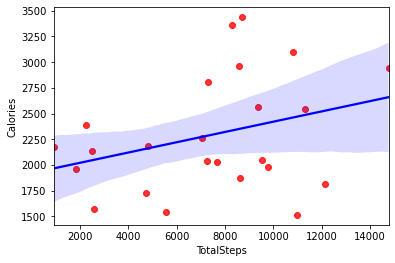

In [345]:
sns.regplot(x='TotalSteps', y='Calories', data=result, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

# Analysing the data above we can conclude that just walking more will not influnce a lot in your calories burn.